In [6]:
import numpy as np

import matplotlib.pyplot as plt
import cv2  
import sys

from PIL import Image
from utils import plot_filtered_image, plot_multiple_rows

%matplotlib inline

In [5]:
!unzip images.zip

"unzip" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


## Edge Detection

### Image gradients

OpenCV provides three types of gradient filters or High-pass filters, Sobel, Scharr and Laplacian. 

First, we will use the `cv2.Sobel` to implement the Sobel operator. Sobel operators is a joint Gaussian smoothing plus differentiation operation, so it is more resistant to noise. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). You can also specify the size of kernel by the argument ksize. If `ksize = -1`, a $3\times3$ Scharr filter is used which gives better results than $3\times3$ Sobel filter. Please see the [docs](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d) for kernels used.

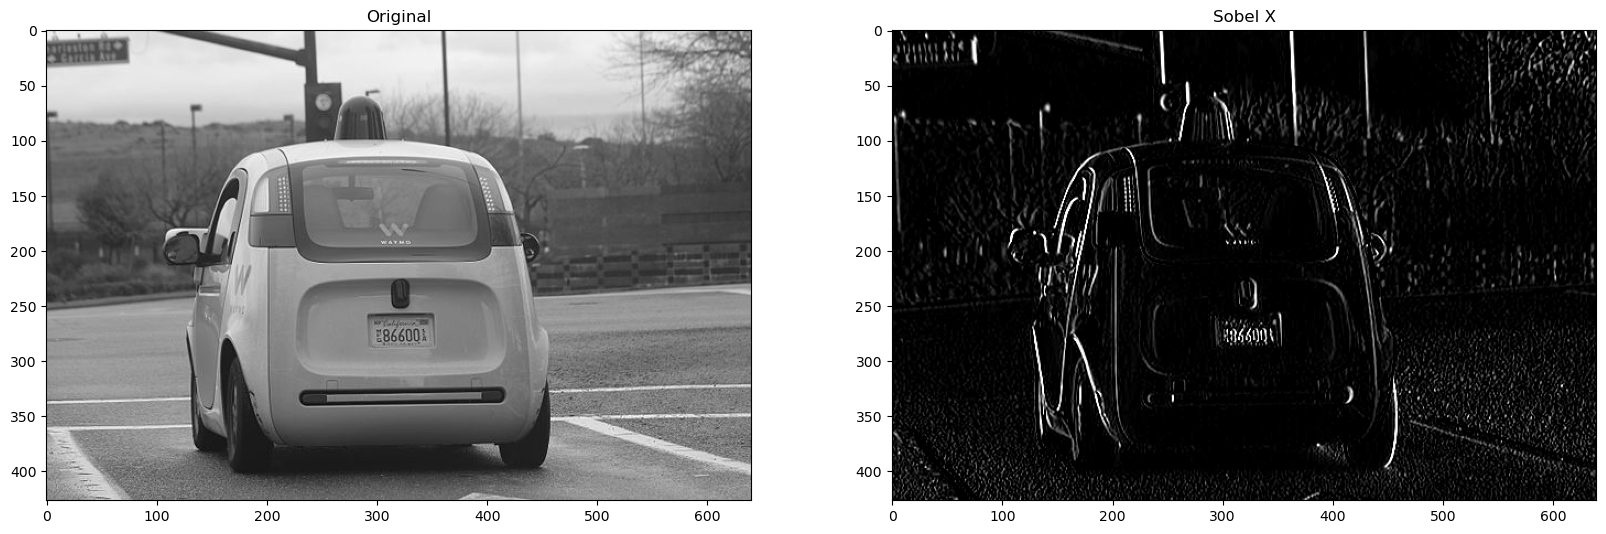

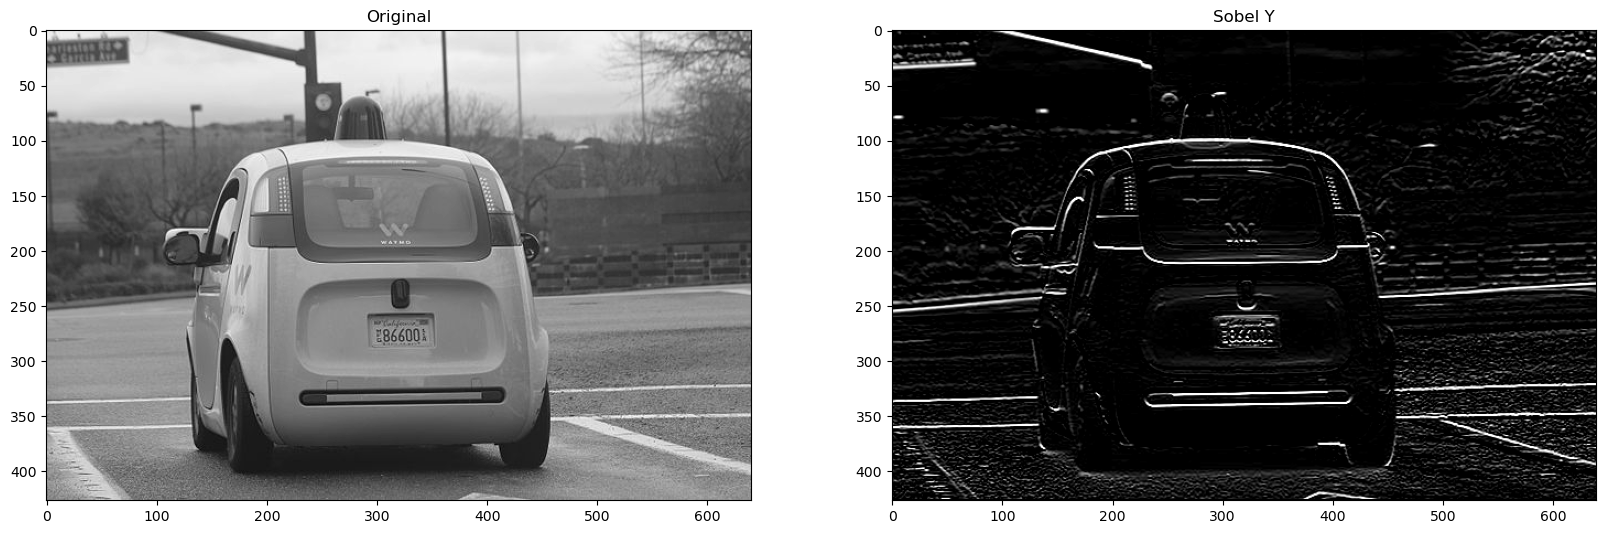

In [21]:
img = Image.open('images/waymo_car.jpg').convert("L")
img = np.array(img)

# Apply the sobel filter across horizontal and vertical directions
sobel_x = cv2.Sobel(src=img, dx=1, dy=0, ddepth=-1, ksize=3)
sobel_y = cv2.Sobel(src=img, dx=0, dy=1, ddepth=-1, ksize=3)

plot_filtered_image(img, sobel_x, "Sobel X", figsize=(20,20))
plot_filtered_image(img, sobel_y, "Sobel Y", figsize=(20,20))

Do you see any difference between the vertical and horizontal filters?

Next, we will implement the `cv2.Laplacian` ([docs](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6)) operator. It calculates the Laplacian of the image given by the relation, $\Delta I = \frac{\delta^2I}{\delta x^2} + \frac{\delta^2I}{\delta y^2}$ where each derivative is found using Sobel derivatives. If ksize = 1, then following kernel is used for filtering:

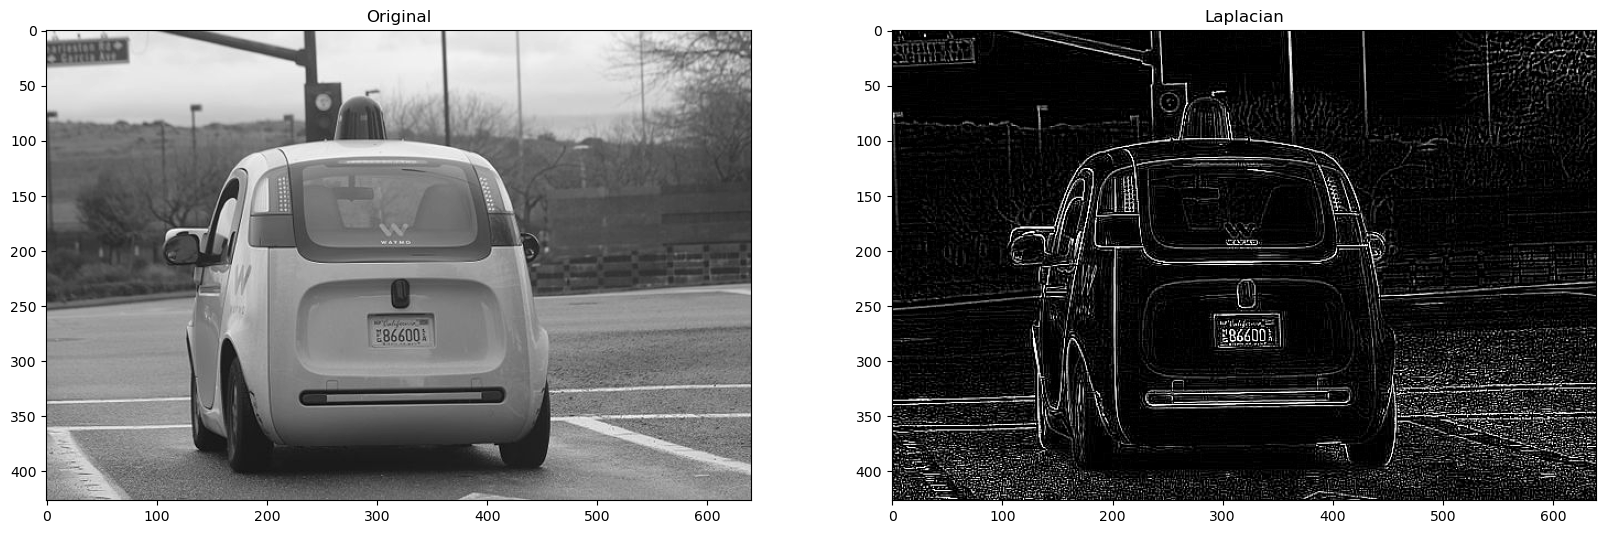

In [22]:
# Define a laplacian filter with kernel size equal 3x3
laplacian = cv2.Laplacian(img, ddepth=-1, ksize=3)

plot_filtered_image(img, laplacian, "Laplacian", figsize=(20,20))

The edge detection methods we have seen so far have some problem in common. They are very **sensitive to noise**! 

The optimal edge detector must be accurate, minimizing the number of false positives and false negatives; have precise localization, pinpointing edges at the positions where they actually occur; and have single response, ensuring that only one edge is found where there only is one edge. In the next section, we'll see a better solution!

### Canny Edge Detection

The Canny edge detector is the most commonly used edge detector in the field. It detects edges by:

1. **Noise Reduction**: since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a Gaussian filter.
2. **Finding Intensity Gradient of the Image**: smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction ($G_x$) and vertical direction ($G_y$).
3. **Non-maximum Suppression**: after getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient.
4. **Hysteresis Thresholding**: any edges with intensity gradient more than *maxVal* are sure to be edges and those below *minVal* are sure to be non-edges, so discarded. 

OpenCV implements the Canny Edge Detector, thus we can implement it using just one line of code! Check the `cv2.Canny` ([docs](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)) function to check how it works.


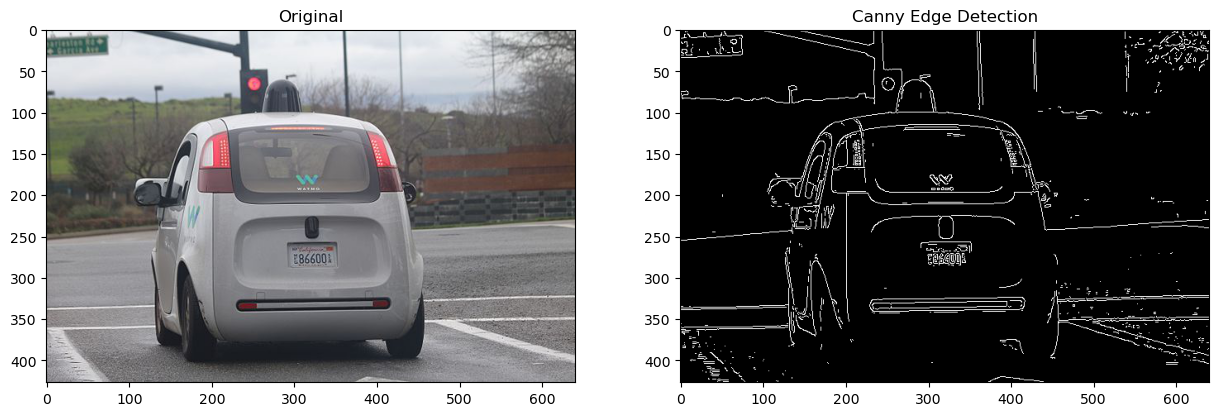

In [29]:
img = np.array(Image.open("images/waymo_car.jpg"))

# Detect the edges using the Canny edge detector

# Values below 190 is not considered an edge
# Values above 230 is not considered an edge
edges = cv2.Canny(img, 190, 230)

plot_filtered_image(img, edges, "Canny Edge Detection", figsize=(15,15))